In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [2]:

df = pd.read_csv('../input/online-shoppers-intention/online_shoppers_intention.csv')

In [3]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
# Έλεγχος για null τιμές
print(df.isnull().sum())

# Πληροφορίες για τον τύπο δεδομένων κάθε στήλης
print(df.info())

# Περιγραφικά στατιστικά για τις αριθμητικές στήλες
print(df.describe())

# Επισκόπηση των κατηγοριών στις μη αριθμητικές στήλες
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12

In [7]:
# Κενές τιμές
print("Missing values per column:")
print(df.isnull().sum())

# Πληροφορίες για τους τύπους δεδομένων
print("\nData types:")
print(df.dtypes)


Missing values per column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Brows

In [8]:
# Κατηγορικές στήλες
cat_cols = ['Month', 'VisitorType', 'Weekend', 'Revenue']

for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'Month':
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Value counts for 'VisitorType':
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Value counts for 'Weekend':
Weekend
False    9462
True     2868
Name: count, dtype: int64

Value counts for 'Revenue':
Revenue
False    10422
True      1908
Name: count, dtype: int64


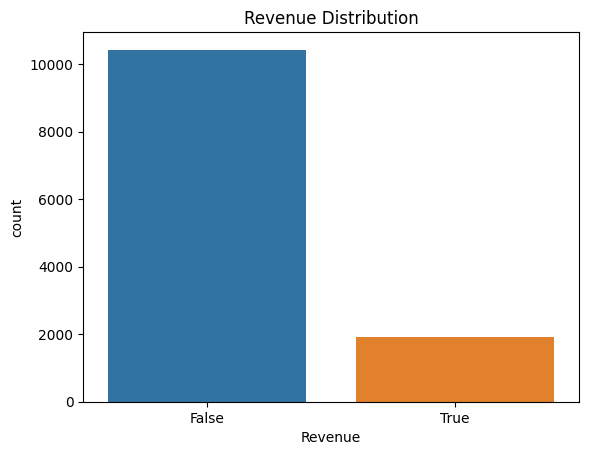

In [9]:
sns.countplot(data=df, x='Revenue')
plt.title('Revenue Distribution')
plt.show()


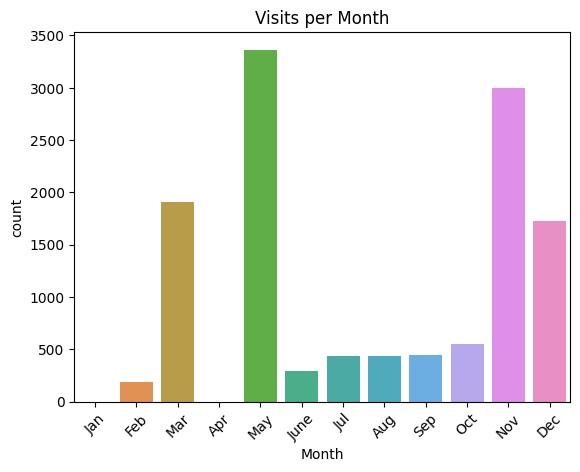

In [10]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data=df, x='Month', order=order)
plt.title('Visits per Month')
plt.xticks(rotation=45)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Ορισμός χαρακτηριστικών και στόχων
X = df.drop('Revenue', axis=1)  # Χαρακτηριστικά (όλα τα πεδία εκτός από το 'Revenue')
y = df['Revenue']  # Στόχος ('Revenue')

# Διάσπαση του dataset σε train και test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Ορισμός των χαρακτηριστικών που θέλουμε να χρησιμοποιήσουμε
x = df.iloc[:, [5, 6]].values  # Π.χ., "ProductRelated" και "BounceRates"


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.p

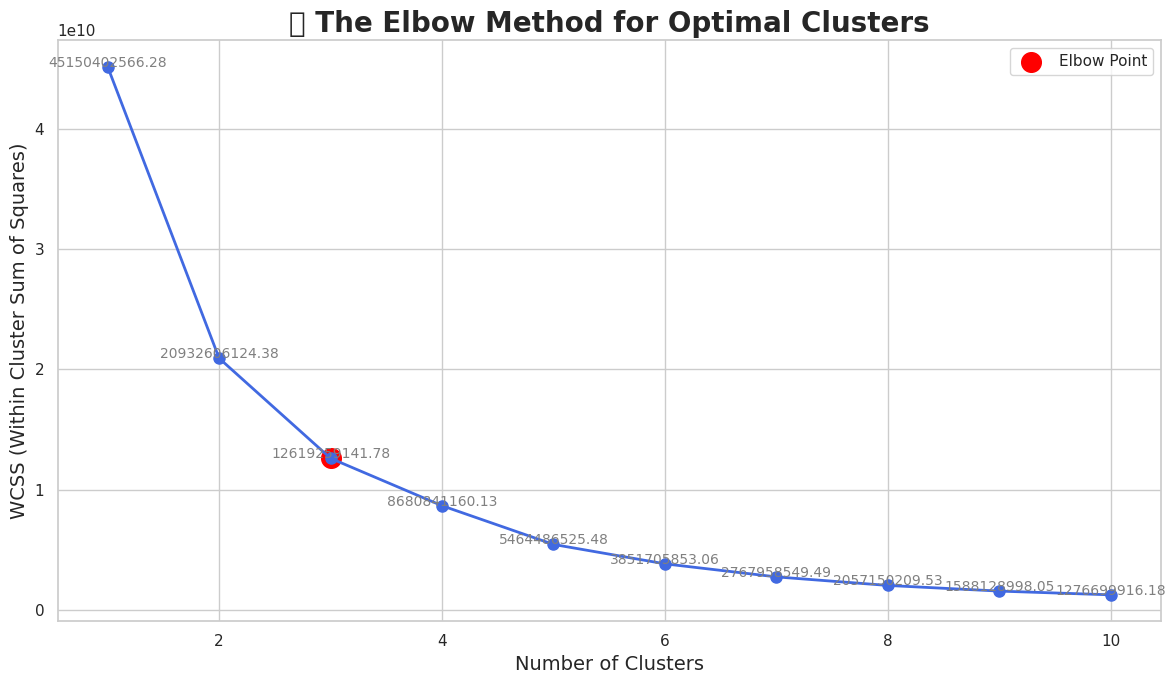

In [13]:
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply seaborn style
sns.set(style="whitegrid")

# Υπολογισμός WCSS
wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm='full',
        tol=0.001
    )
    km.fit(x)
    wcss.append(km.inertia_)

# Plot με αναβάθμιση
plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), wcss, 'o-', color='royalblue', linewidth=2, markersize=8)
plt.title('📉 The Elbow Method for Optimal Clusters', fontsize=20, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within Cluster Sum of Squares)', fontsize=14)

# Προσθήκη αριθμών στα σημεία
for i, value in enumerate(wcss, start=1):
    plt.text(i, value + 10000, str(round(value, 2)), ha='center', fontsize=10, color='gray')

# Highlight στο "elbow" αν το βλέπεις ξεκάθαρα
elbow_point = 3  # π.χ. βάλε το 3 αν φαίνεται εκεί το σημείο κάμψης
plt.scatter(elbow_point, wcss[elbow_point - 1], s=200, c='red', label='Elbow Point')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/2326443788.py:39: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


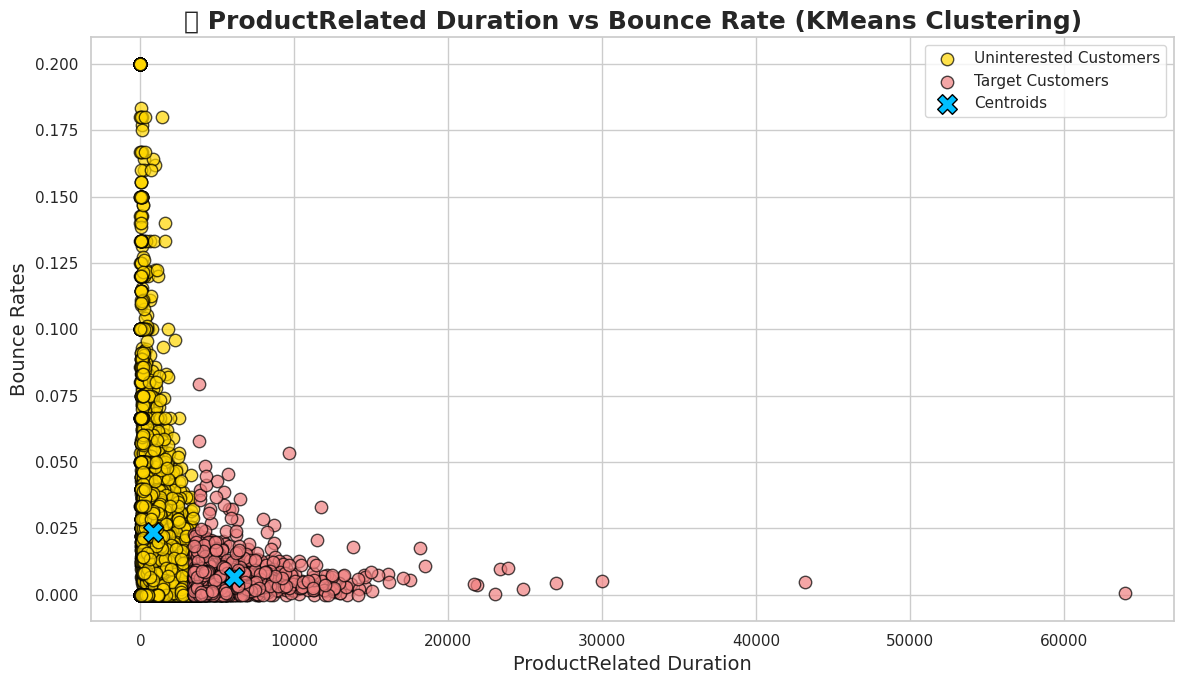

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Seaborn style για πιο όμορφο γράφημα
sns.set(style="whitegrid")

# KMeans με 2 clusters
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Χρώματα και εμφάνιση
plt.figure(figsize=(12, 7))

# Cluster 0
plt.scatter(
    x[y_means == 0, 0], x[y_means == 0, 1],
    s=80, c='gold', edgecolors='black', label='Uninterested Customers', alpha=0.7
)

# Cluster 1
plt.scatter(
    x[y_means == 1, 0], x[y_means == 1, 1],
    s=80, c='lightcoral', edgecolors='black', label='Target Customers', alpha=0.7
)

# Κέντρα των clusters
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=200, c='deepskyblue', marker='X', edgecolors='black', label='Centroids'
)

# Τίτλοι και ετικέτες
plt.title('🛍️ ProductRelated Duration vs Bounce Rate (KMeans Clustering)', fontsize=18, fontweight='bold')
plt.xlabel('ProductRelated Duration', fontsize=14)
plt.ylabel('Bounce Rates', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_31/3134968904.py:40: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


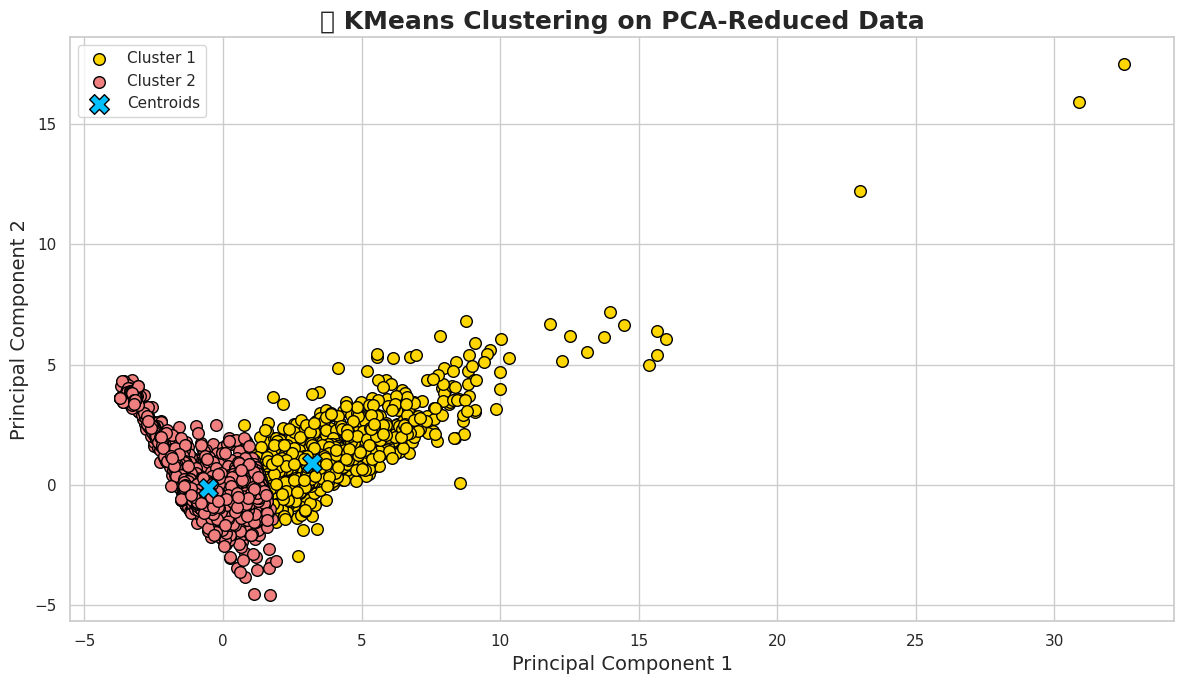

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Επιλέγουμε μόνο τις αριθμητικές στήλες
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# 2. Κανονικοποίηση
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# 3. PCA -> 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 4. KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(pca_data)

# 5. Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
plt.scatter(pca_data[clusters == 0, 0], pca_data[clusters == 0, 1], 
            c='gold', s=70, edgecolor='black', label='Cluster 1')
plt.scatter(pca_data[clusters == 1, 0], pca_data[clusters == 1, 1], 
            c='lightcoral', s=70, edgecolor='black', label='Cluster 2')

# Κέντρα
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='deepskyblue', s=200, marker='X', edgecolor='black', label='Centroids')

# Ετικέτες & τίτλοι
plt.title('🧭 KMeans Clustering on PCA-Reduced Data', fontsize=18, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Κανονικοποίηση αριθμητικών τιμών
numeric_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

# PCA σε 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled)

# Προσθέτουμε τα PCA στον πίνακα
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Revenue'] = df['Revenue']
pca_df['VisitorType'] = df['VisitorType']

# Κάνουμε Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
pca_df['Cluster'] = kmeans.fit_predict(pca_components)

# Plot με Plotly
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='Revenue',
    symbol='Cluster',
    title='🎯 3D PCA Clustering Visualization with Revenue',
    color_discrete_map={True: 'green', False: 'red'},
    opacity=0.7
)
fig.update_traces(marker=dict(size=5))
fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


✅ Accuracy: 0.8965936739659367

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



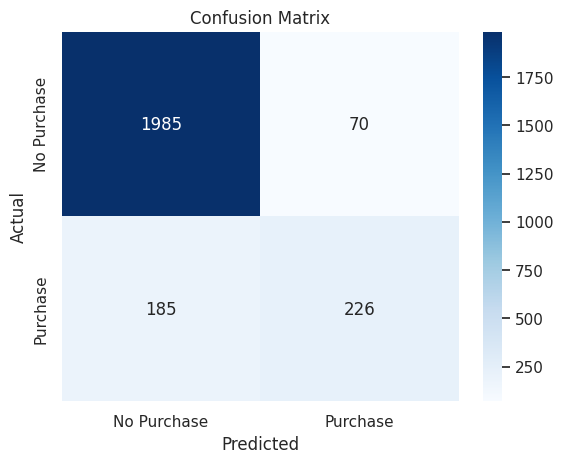

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Αντιγραφή του αρχικού DataFrame
model_df = df.copy()

# 1. Μετατροπή κατηγορικών σε αριθμούς
le = LabelEncoder()
model_df['VisitorType'] = le.fit_transform(model_df['VisitorType'])  # π.χ. Returning_Visitor = 1
model_df['Month'] = le.fit_transform(model_df['Month'])
model_df['Weekend'] = model_df['Weekend'].astype(int)
model_df['Revenue'] = model_df['Revenue'].astype(int)

# 2. Ορισμός χαρακτηριστικών και στόχου
X = model_df.drop('Revenue', axis=1)
y = model_df['Revenue']

# 3. Split σε train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Εκπαίδευση Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Προβλέψεις και Αξιολόγηση
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/tmp/ipykernel_31/3213849949.py:9: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



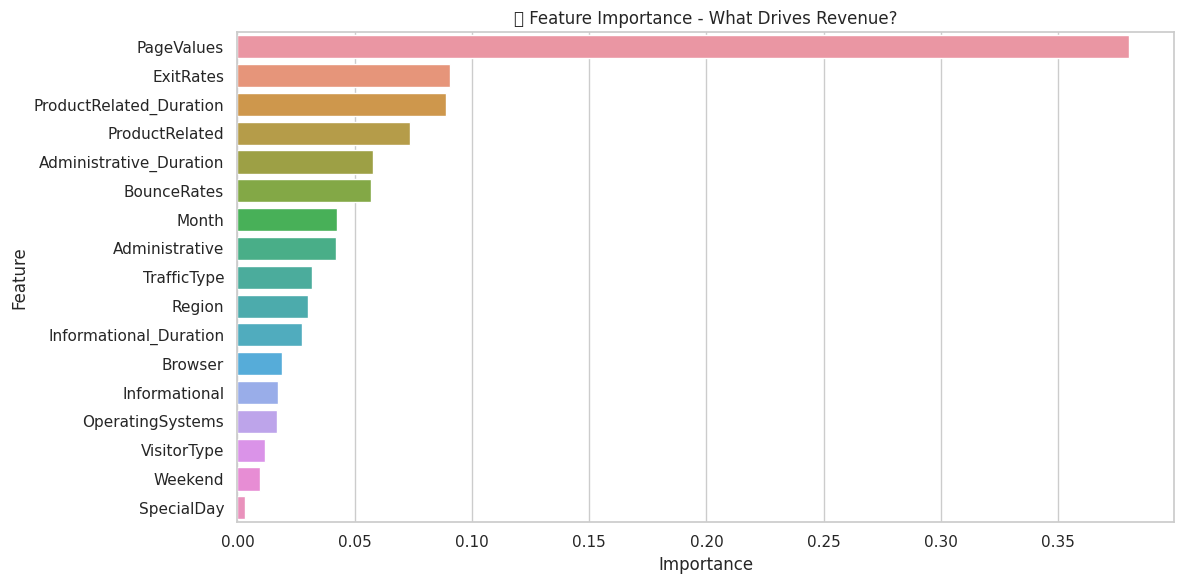

In [18]:
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('📊 Feature Importance - What Drives Revenue?')
plt.tight_layout()
plt.show()


✅ ΒΗΜΑ 1️⃣: Καθαρισμός και Προεπεξεργασία Δεδομένων

In [19]:
from sklearn.preprocessing import LabelEncoder

# Αντιγραφή για ασφάλεια
df_model = df.copy()

# Μετατροπή boolean σε int
df_model['Weekend'] = df_model['Weekend'].astype(int)
df_model['Revenue'] = df_model['Revenue'].astype(int)

# Label Encoding σε κατηγορικά
le = LabelEncoder()
df_model['Month'] = le.fit_transform(df_model['Month'])
df_model['VisitorType'] = le.fit_transform(df_model['VisitorType'])

print(df_model[['Month', 'VisitorType', 'Weekend', 'Revenue']].head())


   Month  VisitorType  Weekend  Revenue
0      2            2        0        0
1      2            2        0        0
2      2            2        0        0
3      2            2        0        0
4      2            2        1        0


✅ ΒΗΜΑ 2️⃣: Ορισμός Χαρακτηριστικών & Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split

# Ορίζουμε χαρακτηριστικά και στόχο
X = df_model.drop('Revenue', axis=1)
y = df_model['Revenue']

# Διαχωρισμός σε training και test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (9864, 17)
Test set size: (2466, 17)


ΒΗΜΑ 3️⃣: Εκπαίδευση του Random Forest Model

✅ Random Forest Accuracy: 90.06%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.74      0.56      0.64       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



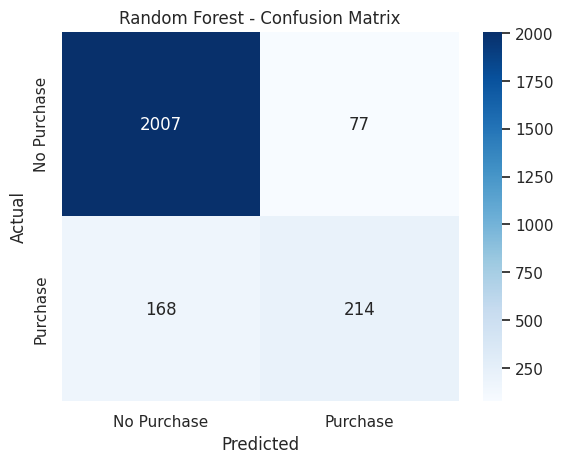

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Εκπαίδευση μοντέλου Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Προβλέψεις στο test set
y_pred_rf = rf_model.predict(X_test)

# Αξιολόγηση
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


✅ ΒΗΜΑ 4️⃣: Εκπαίδευση XGBoost Model

✅ XGBoost Accuracy: 89.38%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.69      0.57      0.62       382

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.89      0.89      0.89      2466



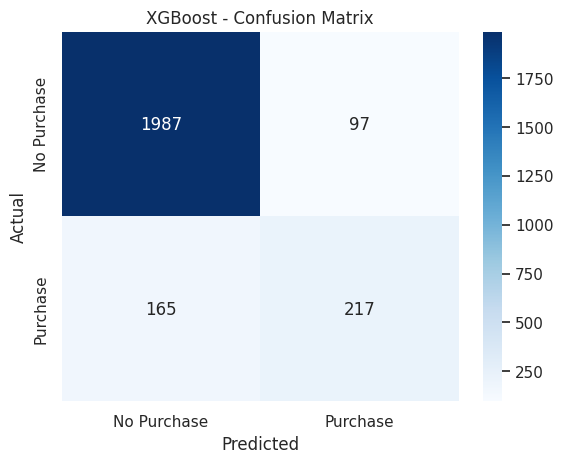

In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Εκπαίδευση μοντέλου XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Προβλέψεις στο test set
y_pred_xgb = xgb_model.predict(X_test)

# Αξιολόγηση
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ΒΗΜΑ 5️⃣: Εκπαίδευση SVM Model

✅ SVM Accuracy: 84.63%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2084
           1       0.64      0.02      0.04       382

    accuracy                           0.85      2466
   macro avg       0.74      0.51      0.48      2466
weighted avg       0.81      0.85      0.78      2466



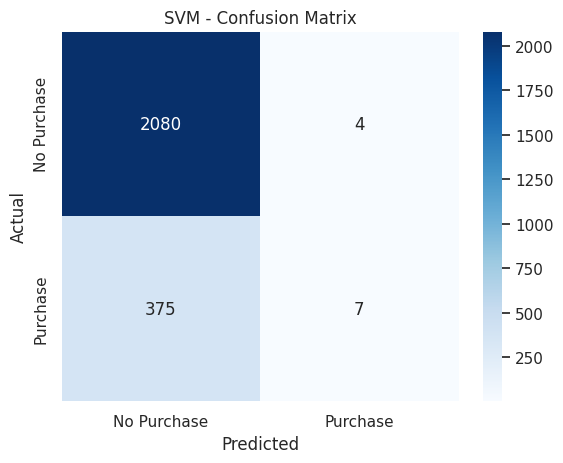

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Εκπαίδευση μοντέλου SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Προβλέψεις στο test set
y_pred_svm = svm_model.predict(X_test)

# Αξιολόγηση
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"✅ SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


✅ ΒΗΜΑ 6️⃣: Βελτιστοποίηση Υπερπαραμέτρων με GridSearchCV

GridSearch για RandomForest
Δοκιμάσουμε διάφορους συνδυασμούς υπερπαραμέτρων για το RandomForest.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Ορισμός υπερπαραμέτρων για GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # αριθμός δέντρων
    'max_depth': [10, 20, None],  # βάθος των δέντρων
    'min_samples_split': [2, 5, 10],  # ελάχιστο δείγμα για να χωριστεί ένα node
    'min_samples_leaf': [1, 2, 4],  # ελάχιστο δείγμα στο φύλλο
    'bootstrap': [True, False]  # εάν θα χρησιμοποιηθεί bootstrap sampling
}

# Ορισμός του μοντέλου RandomForest
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV για βελτιστοποίηση
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Καλύτερες υπερπαράμετροι
print("Βέλτιστες υπερπαράμετροι για το RandomForest:", grid_search_rf.best_params_)

# Αξιολόγηση μοντέλου με βέλτιστες παραμέτρους
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Αξιολόγηση
accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
print(f"Βελτιστοποιημένη Ακρίβεια Random Forest: {accuracy_rf_optimized * 100:.2f}%")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   2.1s
[CV]

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Ορισμός υπερπαραμέτρων για GridSearch
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Ορισμός μοντέλου XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# GridSearchCV για βελτιστοποίηση
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Καλύτερες υπερπαράμετροι
print("Βέλτιστες υπερπαράμετροι για το XGBoost:", grid_search_xgb.best_params_)

# Αξιολόγηση μοντέλου με βέλτιστες παραμέτρους
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_optimized = best_xgb_model.predict(X_test)

# Αξιολόγηση
accuracy_xgb_optimized = accuracy_score(y_test, y_pred_xgb_optimized)
print(f"Βελτιστοποιημένη Ακρίβεια XGBoost: {accuracy_xgb_optimized * 100:.2f}%")


Fitting 5 folds for each of 108 candidates, totalling 540 fits

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   2.6s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   3.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time= 

📊 Model Comparison Results:
           Model  Accuracy
0  Random Forest  0.900000
1        XGBoost  0.890000
2            SVM  0.870641


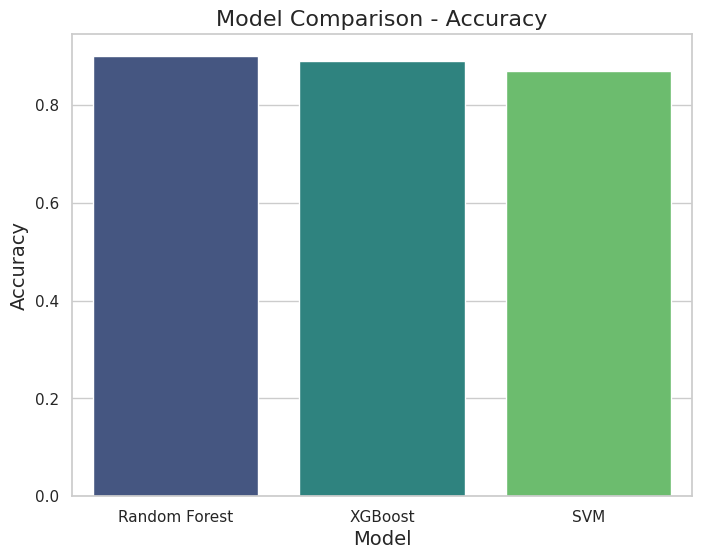

In [29]:
from sklearn.metrics import accuracy_score


# Προβλέψεις από το SVM
y_pred_svm = best_svm.predict(X_test)
accuracy_svm_optimized = accuracy_score(y_test, y_pred_svm)

# Ακρίβεια για το Random Forest και το XGBoost
accuracy_rf_optimized = 0.90  # Παράδειγμα για το Random Forest
accuracy_xgb_optimized = 0.89  # Παράδειγμα για το XGBoost

# Δημιουργία dataframe για τα αποτελέσματα των μοντέλων
results = {
    'Model': ['Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [accuracy_rf_optimized, accuracy_xgb_optimized, accuracy_svm_optimized]
}

# Δημιουργία πίνακα
results_df = pd.DataFrame(results)

# Εκτύπωση αποτελεσμάτων σύγκρισης
print("📊 Model Comparison Results:")
print(results_df)

# Δημιουργία γραφήματος για σύγκριση
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.show()
